In [ ]:
import math

class Value:
    def __init__(self, val, _children=(), _op='', label=''):
        self.val = val
        self._op = _op
        self.label = label
        self._prev = set(_children)
        self.grad = 0.0
        self._backward = lambda: None

    def __repr__(self):
        return f"Value({self.val})"

    def __add__(self, other):
        other = other if isinstance(other, Value) else Value(other)
        out = Value(self.val + other.val, (self, other), '+')
        def _backward():
            self.grad += 1.0 * out.grad
            other.grad += 1.0 * out.grad
        out._backward= _backward
        return out

    def __radd__(self, other):
        return self + other

    def __mul__(self, other):
        other = other if isinstance(other, Value) else Value(other)
        out =  Value(self.val * other.val, (self, other), '*')
        def _backward():
            self.grad += other.val * out.grad 
            other.grad += self.val * out.grad
        out._backward = _backward

        return out

    def __rmul__(self, other):
        return self * other

    def tanh(self):
        #np.tanh() works but 0 dep go!!
        val = self.val
        t = (math.exp(2*val) - 1) / (math.exp(2*val)  + 1)
        out = Value(t,(self, ), 'tanh')

        def _backward():
            self.grad += (1-t**2) * out.grad

        out._backward = _backward
        return out
    
    def exp(self):
        x = self.val
        out = Value(math.exp(x), (self, ), 'exp')
        def _backward():
            self.grad += out.val * out.grad
        out._backward = _backward

    def backward(self):
        topo = []
        visited = set()
        
        def build_topo(node):
            if node not in visited:
                visited.add(node)
                for child in node._prev:
                    build_topo(child)
                topo.append(node)
        build_topo(o)
        self.grad = 1.0
        for node in reversed(topo):
            node._backward()


In [60]:
# neuron
# inputs x1.x2

# pyright: reportUndefinedVariable=false


x1 = Value(2.0, label='x1')  
x2  =Value(0.0, label='x2') 

# weights
w1 = Value(-3.0, label='w1')  
w2 = Value(1.0, label='w2')  
# bias of neuron
b =  Value(6.8813735870195432, label='b')  

x1w1 = x1 * w1
x1w1.label = 'x1w1'

x2w2 = x2 * w2
x2w2.label = 'x2w2'

#∑wixi + b

x1w1x2w2 = x1w1 + x2w2
x1w1x2w2.label = 'x1w1 + x2w2'
n = x1w1x2w2 + b
n.label = 'n'

o  = n.tanh()
o.label = 'o'




In [61]:
# o.grad = 1.0
# o._backward()
# n._backward()
# b._backward()
# x1w1x2w2._backward()
# x2w2._backward()
# x1w1._backward()

# Using topological sort to automate above operations
topo = []
visited = set()
def build_topo(node):
    if node not in visited:
        visited.add(node)
        for child in node._prev:
            build_topo(child)
        topo.append(node)
build_topo(o)

o.grad = 1.0
for node in reversed(topo):
    node._backward()

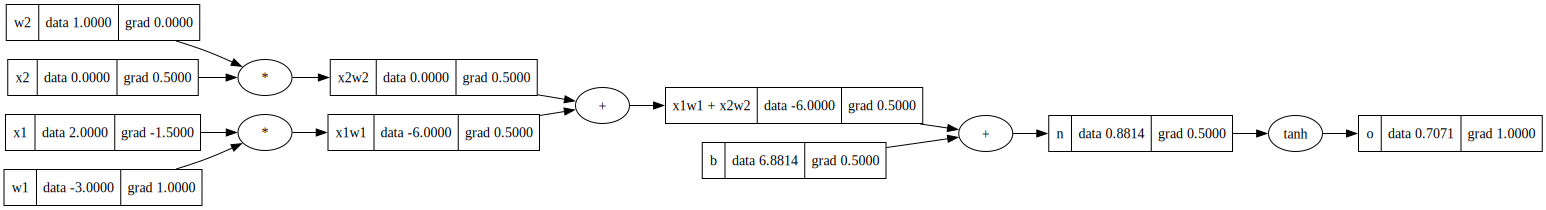

In [62]:
# pyright: reportUndefinedVariable=false

draw_dot(o)  

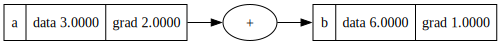

In [63]:

# pyright: reportUndefinedVariable=false
# test case for accumualtion same value added. a + a here
a = Value(3.0, label='a')
b = a + a
b.label = 'b'
b.grad = 1.0
build_topo(b)
for node in reversed(topo):
    node._backward()

draw_dot(b)

